# HW2  Linear Regression and Logistisc Regression 

<h2><b>Vagner Machado - Data Analytics - Queens College - Fall 2020</b></h2>

## Due on 11/02/2020: 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### This HW is split into two part. In Part A we will be building a Linear Regression model using housing data while in Part B, we will build a Logistic Regression model. Note that some questions will carry more weights than the others. Question 3, 4, 7 and 8 will carry most weights  

### Part A

#### First let's build a Linear Regression model for a housing dataset

In [2]:
housing = pd.read_csv("USA_housing.csv")
housing.head()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


### we can use simple scatter to check how the house price depends on different variables


<AxesSubplot:xlabel='HouseAge', ylabel='Price'>

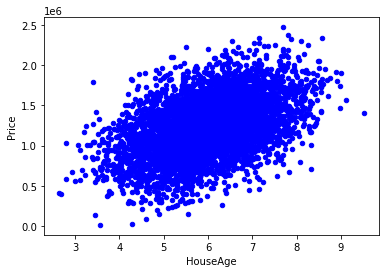

In [3]:
housing.plot(kind='scatter', x = "HouseAge", y = "Price", color = "blue")

<AxesSubplot:xlabel='NumberOfRooms', ylabel='Price'>

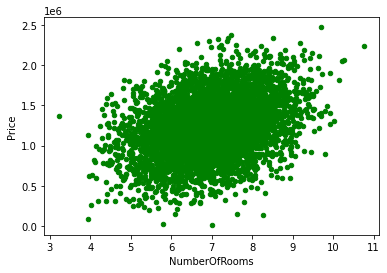

In [4]:
housing.plot(kind='scatter', x = "NumberOfRooms", y = "Price", color = "green")

### Question 1: Use a pairplot to see all the scatter plots with the numerical variables in one grid

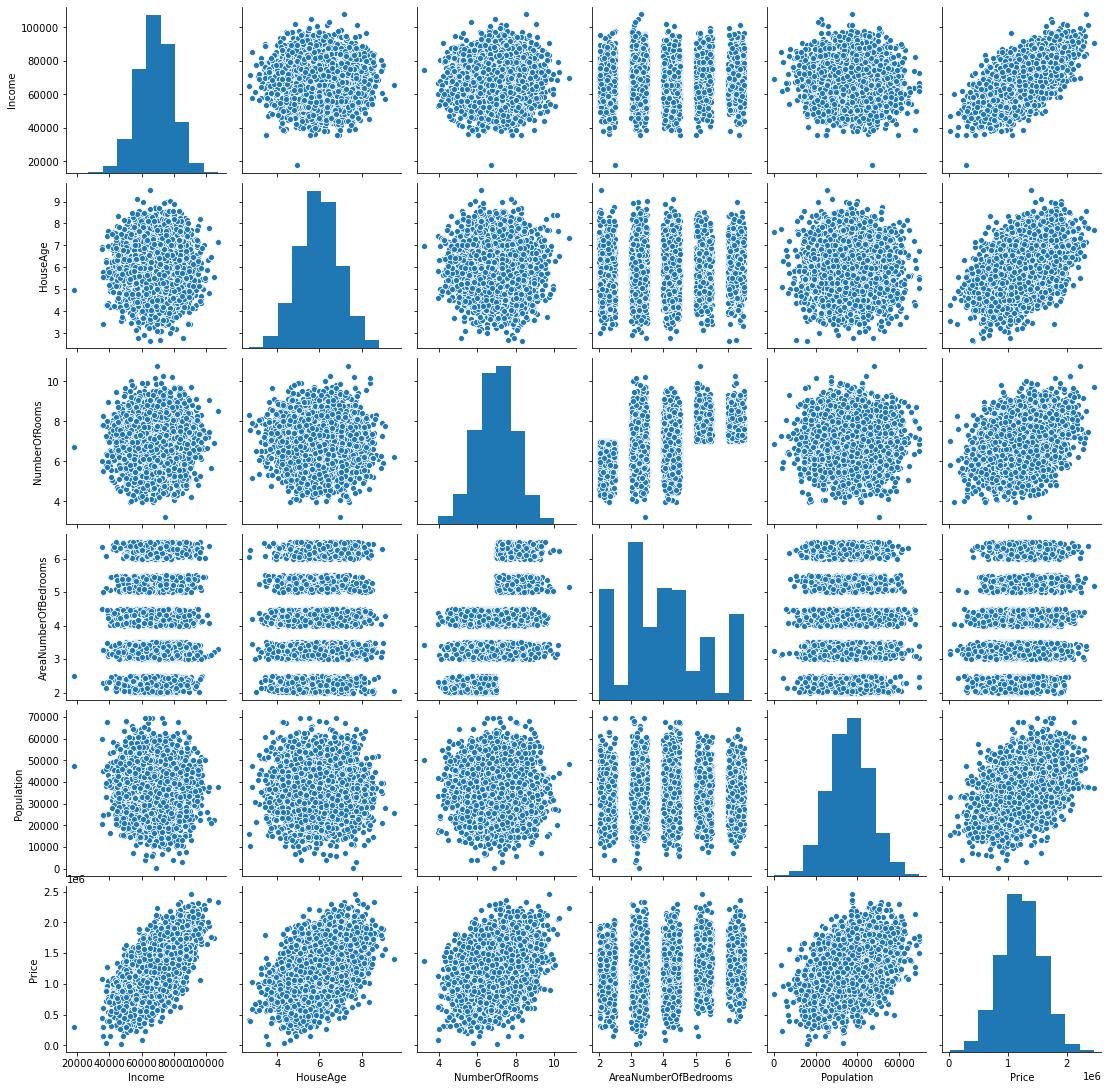

In [5]:
sns.pairplot(housing) # only numerical columns are displayed

### Question 2: Use the above pairplot as well as calculating the correlation, pick one variable that affects the house price the most

In [6]:
housing.corr() # shows the correlation betweet the variables

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price
Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
HouseAge,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
NumberOfRooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
AreaNumberOfBedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<pre> 
<p><b>Question 2 Answer: </b>Evident in the pair plot and confirmed by the calculated correlation between variables, the <u><i>income</i></u> is the variable that affects the house price the most.</p>
<pre>

### Question 3: Use that variable to build a one-variable Linear Regression model of the house price. Make sure you split the data between Training and Testing set first, Save 20% as your testing data. Show your R-square and RMSE

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

Housing Data Shape:  (5000, 7)
X Data Shape:  (5000, 1)
Y Data Shape:  (5000, 1)
X train:  (4000, 1)
X test :  (1000, 1)
Y train:  (4000, 1)
Y test :  (1000, 1)
Intercept:  [-224617.80110797]
Coeficient:  [[21.24368249]]


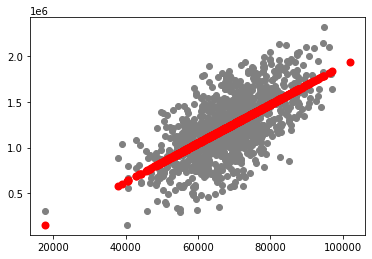

Root Mean Squared Error: 272184.4854520049
R-squared: 0.4006059806785851


In [8]:
housing.isnull().any() # no deletion or imputation needed
housingModel = LinearRegression()
Xarray = housing['Income'].values
Yarray = housing['Price'].values
X = Xarray.reshape(-1,1)
Y = Yarray.reshape(-1,1)
print("Housing Data Shape: ", housing.shape) # lots of data!
print("X Data Shape: ", X.shape)
print("Y Data Shape: ", Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("X train: ", X_train.shape)
print("X test : ", X_test.shape)
print("Y train: ", Y_train.shape)
print("Y test : ", Y_test.shape)  # 4000 to 1000 ratio. 20% achieved.
housingModel = LinearRegression()
housingModel.fit(X_train, Y_train)
print("Intercept: ", housingModel.intercept_)
print("Coeficient: ", housingModel.coef_)
Y_pred = housingModel.predict(X_test)
plt.scatter(X_test, Y_test,  color='gray')
plt.scatter(X_test, Y_pred, color='red', linewidth=2)
plt.show()
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

### Question 4: Now do a 10-fold Cross Validation of your model. Does your model pass cross validation?

Trial 0, R-squared: 0.40273729718455376,  Slope: [[21.32214811]], Intercept: [-229165.88368401]  
Trial 1, R-squared: 0.4331014988360101,  Slope: [[21.0609759]], Intercept: [-208921.89646627]  
Trial 2, R-squared: 0.3943321556787458,  Slope: [[21.16162756]], Intercept: [-218844.17414843]  
Trial 3, R-squared: 0.44196373714404436,  Slope: [[21.16583432]], Intercept: [-220270.81051263]  
Trial 4, R-squared: 0.3981164570601853,  Slope: [[21.32556599]], Intercept: [-231833.49875483]  
Trial 5, R-squared: 0.42026075328601575,  Slope: [[21.15333996]], Intercept: [-216568.06526187]  
Trial 6, R-squared: 0.45154193291243094,  Slope: [[20.75513068]], Intercept: [-191820.94574127]  
Trial 7, R-squared: 0.42374046300672064,  Slope: [[21.19554993]], Intercept: [-221124.1043789]  
Trial 8, R-squared: 0.3821560908377276,  Slope: [[21.103192]], Intercept: [-213568.87131937]  
Trial 9, R-squared: 0.3813528630131173,  Slope: [[21.25030809]], Intercept: [-226653.64762365]  

 0.41293032489595516 is the 

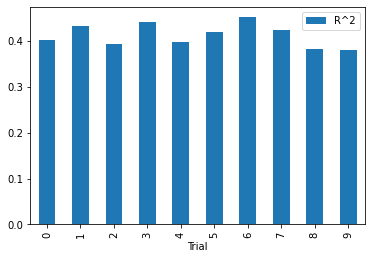

In [9]:
import random
rSquaredValues = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    r2 = (metrics.r2_score(Y_test, Y_pred))
    rSquaredValues.append(r2)
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {}  '.format(i, r2, model.coef_, model.intercept_))
r2Frame = pd.DataFrame({'Trial': range(10), "R^2": rSquaredValues})
r2Frame.plot.bar(x='Trial',y='R^2')
print("\n", r2Frame['R^2'].mean(), "is the mean R sqaured value.")

<pre>
<b>Question 4 Answer: </b> According to the 10 fold cross validation, the R Squared value hovers closely 
to 0.4 in the 10 folds, indicating that the model passes the cross validation test. As a personal 
analysis, maybe including an extra variable in the model would generate better R^2 and RMSE values.
Case I went for that, I would chose 'House Age' and 'Population' as the additional data points. As
a counter argument to my own, since the dependent variable 'Price' has high-highs and low-lows,
I am also lead to believe that adding those two data columns in the model would cause an improvement
to the performance metric, yet not enough to bring R^2 to 0.7 range, specially because their 
correlation with 'Price' is low: 0.45 and 0.40. 
</pre>

### Good Job.

#### Thank you!  😁

### Part B:  Let's build a Logistic Regression model using the affairs data from
https://www.statsmodels.org/dev/datasets/generated/fair.html

The goal of the HW is to see if one can predict
whether a woman on given certain attributeds, suchas age, years married, number of children etc, will particpate
in an affair or not


#### DataSet Description

From the [Statsmodels website](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html) we have the following information about the data:

Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs

See the original paper for more details.

In [10]:
# The dataset can be imported via the statsmodels like the following, but we are going to read from a csv file
# provided by the professor
# import statsmodels.api as sm
# orig_df = sm.datasets.fair.load_pandas().data
import pandas as pd
import numpy as np
df = pd.read_csv("affairs2.csv")
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,4.666666


Now, create a new column called 'had_affair'. We will set this column equal to 0 if the affairs column is 0 (meaning no time spent in affairs) otherwise the 'Had_Affair' value will be set as 1, indicating that the woman had an affair.

In [11]:
# has_affair
def has_affair(x):
    if x != 0:
        return 1
    else:
        return 0

# Apply to DataFrame
df['had_affair'] = df['affairs'].apply(has_affair)

In [12]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,occ2,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,occ3,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,occ3,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,occ5,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,occ3,4.0,4.666666,1


In [13]:
df.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
6466,5.0,32.0,13.0,2.0,3.0,17.0,occ4,3.0,0.0,0
6467,4.0,32.0,13.0,1.0,1.0,16.0,occ5,5.0,0.0,0
6468,5.0,22.0,2.5,0.0,2.0,14.0,occ3,1.0,0.0,0
6469,5.0,32.0,6.0,1.0,3.0,14.0,occ3,4.0,0.0,0
6470,4.0,22.0,2.5,0.0,2.0,16.0,occ2,4.0,0.0,0


#### Let's do some exploratory data analysis. First check and remove missing values

In [14]:
#Initial testing
df.isnull().any() #some age is null
print("Shape of data: " , df.shape)
print("Shape of age = nan:", df[np.isnan(df.age)].shape) # 105 rows without age

Shape of data:  (6471, 10)
Shape of age = nan: (105, 10)


### Question 5: Use a seaborn heatmap similar to what has shown in class to show if there are any missing values. Simply drop the rows that have missing values

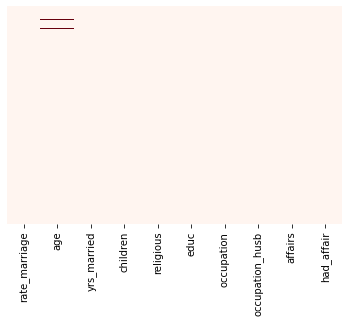

In [15]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Reds')
df = df[~np.isnan(df['age'])] # sets the data fram to data rows that does not have age as nan


After dropping the NA, run the df.isnull().sum(), it should show 0 for every features

In [16]:
df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
had_affair         0
dtype: int64

### Now, let's group by has or no affairs rows

In [17]:
df.groupby('had_affair').mean()
#df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation_husb,affairs
had_affair,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.884559,2.187243


So, one can see older woman who has married longer will have higher chance of having an affairs

We can also use Factorplot to see the effect from age

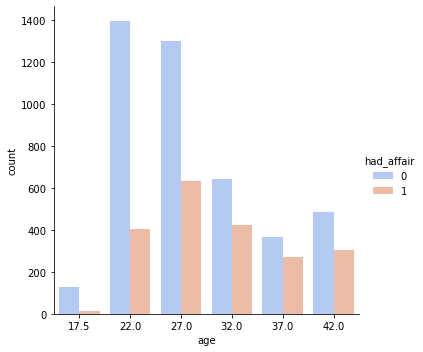

In [18]:
# Use Factorplot for age
sns.factorplot('age', kind='count', hue='had_affair', data=df,palette='coolwarm')

By looking at the ratio between the has_affair=1 versus has_affair=0, one can see that the older the woman, the higher the probability of having an affair

We can do the same thing for other variables such as years of marriage, number of children etc

### Question 6: Call factorplot for years of marriage, and number of children. Comment on whether you think they are importance factors

,rate_marriage,age,yrs_married,children,religious,educ,occupation_husb,affairs,had_affair
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.027745,-0.178068,-0.331776
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.162567,-0.089964,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.128135,-0.087737,0.203109
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,0.086660,-0.070278,0.159833
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.004061,-0.125933,-0.129299
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.183932,-0.017740,-0.075280
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,1.000000,-0.015614,0.017637
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,-0.015614,1.000000,0.464046
had_affair,-0.331776,0.146519,0.203109,0.159833,-0.129299,-0.075280,0.017637,0.464046,1.000000


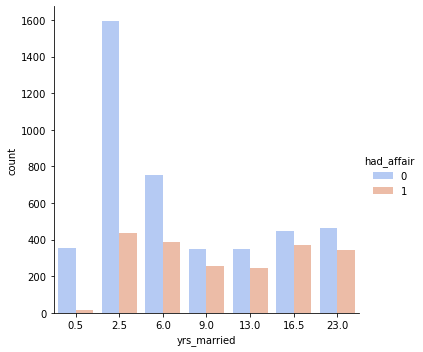

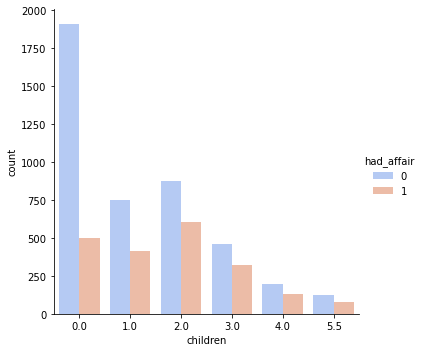

In [19]:
# Use Factorplot for year of marriage
sns.factorplot('yrs_married', kind='count', hue='had_affair', data=df,palette='coolwarm')

# Use Factorplot for number of children
sns.factorplot('children', kind='count', hue='had_affair', data=df,palette='coolwarm')
df.corr()

<pre>
<b>Question 6 Answer: </b> After looking at the factor plots for 'number of children' and 'years of marrige', I 
think that the 'number of children' is an important factor for determining if the person is more likely to 
have an affair or not, as the ratio of 'having an affair' and 'not having an affair' increases as 'number 
of children' grows. The 'years of marriage' variable seems to be an important factor as well. This graph also
clearly shows that the ration of affairs goes up as years of marriage goes up. Further testing with corr() 
confirms a positive correltion between 'having an affair' and the two variables in question. 
</pre>

### Question 7: build a logistic regression model with only Age, Number of years married, number of children, education, religious to forecast had_affair. Remember to do the Train Test Split first

type your work here

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [21]:
# Hint:
# create a df2 from df with all the age, years of married, ... columns
# call train_test_split, remember to drop the had_affair columns in your X variables, Y should be had_affair
# create a LogisticRegression object and call its fit method
# call the classification report and print accuracy score

df2 = df[['had_affair','age', 'yrs_married', 'children', 'religious', 'educ']]
X_train, X_test, y_train, y_test = train_test_split(df2.drop('had_affair',axis=1), 
                                                    df2['had_affair'], 
                                                    test_size=0.20, 
                                                    random_state=101)
affairModel = LogisticRegression()
affairModel.fit(X_train, y_train)
predictions = affairModel.predict(X_test)
print("Classification Table:\n\n",classification_report(y_test, predictions))
print("Accuracy Score: ",accuracy_score(y_test, predictions))

Classification Table:

               precision    recall  f1-score   support

           0       0.70      0.95      0.80       850
           1       0.62      0.17      0.26       424

    accuracy                           0.69      1274
   macro avg       0.66      0.56      0.53      1274
weighted avg       0.67      0.69      0.62      1274

Accuracy Score:  0.6883830455259027


### Question 8: Now, call a countplot to show the dependence of the affair on occupation, then include the occupation categorical variable to build a better model

<AxesSubplot:xlabel='occupation', ylabel='count'>

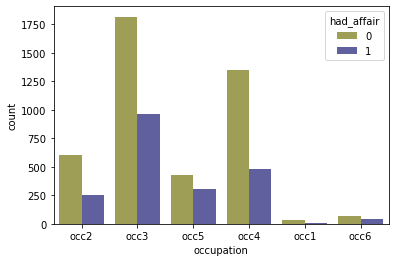

In [22]:
# call sns.countplot for occupation using the original df dataframe
sns.countplot(x='occupation', hue='had_affair',data=df, palette='gist_stern_r')

In [23]:
# call the get_dummies method for the occupation variable
occupation = pd.get_dummies(df['occupation'], drop_first=True) 

In [24]:
# create a df3 which is combining df2 with this new set of dummy variables using pd.concat method
df3 = pd.concat([df2, occupation], axis = 1)
df3.head() #looks right: dummy variables created for occupation

,had_affair,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6
0,1,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0
1,1,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0
2,1,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0
3,1,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0
4,1,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0


In [25]:
# now you have a df3 with 10 features  # very interesting!   ;)
# call train test split and do the usual model fitting and model performance things

X_train2, X_test2, y_train2, y_test2 = train_test_split(df3.drop('had_affair',axis=1), 
                                                    df3['had_affair'], 
                                                    test_size=0.20, 
                                                    random_state=101)
affairModel2 = LogisticRegression()
affairModel2.fit(X_train2, y_train2)
predictions2 = affairModel2.predict(X_test2)
print("Classification Table with Occupation:\n\n",classification_report(y_test2, predictions2))
print("Accuracy Score: ",accuracy_score(y_test2, predictions2))

Classification Table with Occupation:

               precision    recall  f1-score   support

           0       0.70      0.94      0.80       850
           1       0.62      0.19      0.29       424

    accuracy                           0.69      1274
   macro avg       0.66      0.57      0.55      1274
weighted avg       0.67      0.69      0.63      1274

Accuracy Score:  0.6915227629513344


## Question 9: Can you comment on your results based on the performance metrics (Precision, Recall and Accuracy Score)?

<pre>
<b>Let's take a look at both results first</b>

<p>*********************************************************************</p>
<em>Classification Table for Logistic regression without occupation</em>

               precision    recall  f1-score   support

           0       0.70      0.95      0.80       850
           1       0.62      0.17      0.26       424

    accuracy                           0.69      1274
   macro avg       0.66      0.56      0.53      1274
weighted avg       0.67      0.69      0.62      1274

Accuracy Score:  0.6883830455259027
<p>*********************************************************************</p>

<p>*********************************************************************</p>
<em>Classification Table for Logistic regression with occupation</em>

               precision    recall  f1-score   support

           0       0.70      0.94      0.80       850
           1       0.61      0.19      0.29       424

    accuracy                           0.69      1274
   macro avg       0.66      0.57      0.55      1274
weighted avg       0.67      0.69      0.63      1274

Accuracy Score:  0.6907378335949764
<p>*********************************************************************</p>


Let's first look at the metric the accuracy score for the number of data points identified
correctly. When we compare the first and the second Logistic Regressions, we notice that the 
accuracy score improves very slightly (can change if data is run again), meaning the second regression
had more data points identified correctly. Now, let's locate the improved identifications.
While the precison of had_affair = 0 remained the same for both logistic regressions, the
precision for had_affair = 1 improved on the second data set by 1%. Precison, which is the 
ratio between the True Positives and all the Positives, goes up, which contributes for the slight incresase in 
the accuracy score. Recall, which is the measure of our model correctly identifying True Positives,
is lower on the second data set for had_affair = 0 by 1%, but for had_affair = 1, the second model 
shows a 2% improvement, which can be seen as a slight improvement as well.

Conclusion: Despite adding the occupation feature to the second logistic regression, the
accuracy score improved by less than 0.5%. This leads me to believe that occupation does not provide
data that can significantly improve the logistic regression. Further, one has to realize that the 
data used as input for the regressions is the same and that unless you add a feature having a strong
correlation with the independent variable, the results can tend to be similar.


<em>Vagner</em>

</pre>